# Loading the model and make prediction on Unknown Data

In [1]:
# import libraries
import numpy as np
import pandas as pd
import os
import sys
import pickle
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score,classification_report
from sklearn.metrics import confusion_matrix
from tensorflow import keras
import matplotlib.pyplot as plt
import tensorflow as tf


In [2]:
cnn = tf.keras.models.load_model('./Saved_Model/mymodel.keras')

d:\python\Machine_Learning\.conda\Lib\site-packages\keras\src\saving\saving_lib.py:396: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 22 variables whereas the saved optimizer has 42 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    './Data/Test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 3096 files belonging to 4 classes.
['canker', 'greening', 'healthy', 'leaf_miner']


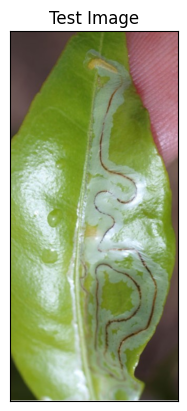

In [8]:
#Test Image Visualization
import cv2
image_path = 'D:/Project/check/1.jpg'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
# Displaying the image
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
This Image most likely belongs to leaf_miner


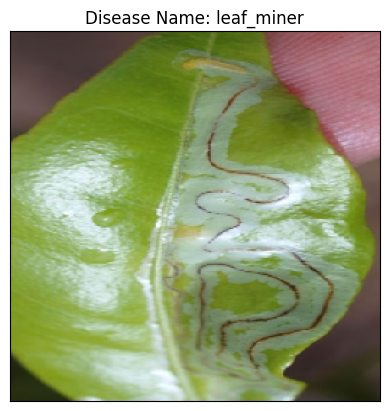

In [9]:
# Test Image Prediction on single image
img = keras.preprocessing.image.load_img(image_path, target_size=(256, 256))

img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create a batch

predictions = cnn.predict(img_array)
score = tf.nn.softmax(predictions[0])

print("This Image most likely belongs to",class_name[np.argmax(score)])
result_index = np.argmax(predictions) #Return index of max element

# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()


In [6]:
# classification report of model performing on Test data
y_pred = []
y_true = []
for x, y in validation_set:
    y_pred.extend(np.argmax(cnn.predict(x), axis=1))
    y_true.extend(np.argmax(y, axis=1))
    if len(y_pred) >= len(validation_set):
        break
print(classification_report(y_true, y_pred, target_names=class_name))


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 657ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 713ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 919ms/step
              precision    recall  f1-score   support

      canker       1.00      1.00      1.00        14
    greening       0.97      1.00      0.98        32
     healthy       1.00      0.98      0.99        44
  leaf_miner       1.00      1.00      1.00        38

    accuracy                           0.99       128
   macro avg       0.99      0.99      0.99       128
weighted avg       0.99      0.99      0.99       128



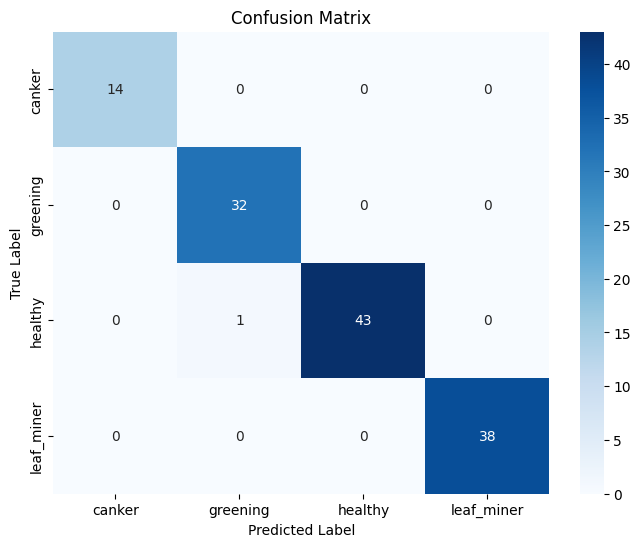

In [7]:
import seaborn as sns
# confusion matrix of model performing on Test data
confusion = confusion_matrix(y_true, y_pred)

# Plot confusion matrix with numerical values
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=class_name, yticklabels=class_name)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
